In [292]:
import pandas as pd
from scipy.stats import entropy
import numpy as np
import matplotlib.pyplot as plt

In [293]:
# reading the text file

df = pd.read_csv('anonymized-curriculum-access.txt', 
                engine='python',
                 header=None,
                 index_col=False,
                 
                 sep=r'\s(?=(?:[^"]*"[^"]*")*[^"]*$)(?![^\[]*\])',
                 na_values='"-"'
                 )

In [294]:
# creating default params for plotting
plt.rc('figure', figsize = (15, 8))

In [295]:
# taking a quick look at the data
df

,0,1,2,3,4,5
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61
...,...,...,...,...,...,...
719454,2020-11-02,16:48:13,javascript-i/coffee-project,763,62.0,107.192.148.199
719455,2020-11-02,16:48:17,javascript-i/mapbox-api,771,62.0,172.125.226.175
719456,2020-11-02,16:48:18,javascript-i/coffee-project,771,62.0,172.125.226.175
719457,2020-11-02,16:48:28,javascript-i/bom-and-dom/bom,771,62.0,172.125.226.175


In [296]:
# giving column names to the data

df.columns = ['date', 'time', 'page', 'user_id','cohort_id', 'ip']

In [297]:
# combining the day and the time of the day together

df['date_time'] = df.date.astype(str) +' '+ df.time.astype(str)

In [298]:
# dropping the extra column
#df.drop(columns = 'time', inplace = True)

In [299]:
# converting the date to pandas datetime type
df.date_time = pd.to_datetime(df.date_time)

In [300]:
df = df.set_index('date_time')

In [301]:
df

,date,time,page,user_id,cohort_id,ip
date_time,,,,,,
2018-01-26 09:55:03,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
2018-01-26 09:56:02,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2018-01-26 09:56:05,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
2018-01-26 09:56:06,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
2018-01-26 09:56:24,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61
...,...,...,...,...,...,...
2020-11-02 16:48:13,2020-11-02,16:48:13,javascript-i/coffee-project,763,62.0,107.192.148.199
2020-11-02 16:48:17,2020-11-02,16:48:17,javascript-i/mapbox-api,771,62.0,172.125.226.175
2020-11-02 16:48:18,2020-11-02,16:48:18,javascript-i/coffee-project,771,62.0,172.125.226.175


In [302]:
df.cohort_id.value_counts(dropna = False)

28.0    60315
NaN     44840
33.0    40168
29.0    37548
53.0    36047
24.0    35624
57.0    32447
56.0    31670
22.0    30328
51.0    29688
58.0    28354
32.0    28333
23.0    28329
26.0    27637
52.0    27518
25.0    25427
31.0    25253
34.0    25181
59.0    22425
27.0    20447
55.0    20411
61.0    11774
14.0     9495
1.0      8884
62.0     8718
21.0     7444
17.0     4925
13.0     2733
18.0     2005
8.0      1712
19.0     1165
16.0      743
15.0      691
7.0       495
12.0      302
11.0      208
2.0        93
6.0        72
9.0         5
4.0         4
5.0         1
Name: cohort_id, dtype: int64

In [303]:
# df = df.fillna(0)

In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 719459 entries, 2018-01-26 09:55:03 to 2020-11-02 16:48:47
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   date       719459 non-null  object 
 1   time       719459 non-null  object 
 2   page       719458 non-null  object 
 3   user_id    719459 non-null  int64  
 4   cohort_id  674619 non-null  float64
 5   ip         719459 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 38.4+ MB


In [305]:
df.page.value_counts().head(30)

/                                                                            40122
search/search_index.json                                                     15393
javascript-i                                                                 14551
toc                                                                          14018
java-iii                                                                     10835
html-css                                                                     10804
java-ii                                                                      10374
spring                                                                        9914
jquery                                                                        9243
mysql                                                                         9043
java-i                                                                        9023
javascript-ii                                                                 8701
appe

In [306]:
ent = entropy(df.user_id, base =None)
ent

13.306631006787727

In [307]:
ent = entropy(df.cohort_id, base = None)
ent

nan

In [308]:
df

,date,time,page,user_id,cohort_id,ip
date_time,,,,,,
2018-01-26 09:55:03,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
2018-01-26 09:56:02,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2018-01-26 09:56:05,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
2018-01-26 09:56:06,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
2018-01-26 09:56:24,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61
...,...,...,...,...,...,...
2020-11-02 16:48:13,2020-11-02,16:48:13,javascript-i/coffee-project,763,62.0,107.192.148.199
2020-11-02 16:48:17,2020-11-02,16:48:17,javascript-i/mapbox-api,771,62.0,172.125.226.175
2020-11-02 16:48:18,2020-11-02,16:48:18,javascript-i/coffee-project,771,62.0,172.125.226.175


In [309]:
df

,date,time,page,user_id,cohort_id,ip
date_time,,,,,,
2018-01-26 09:55:03,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
2018-01-26 09:56:02,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2018-01-26 09:56:05,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
2018-01-26 09:56:06,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
2018-01-26 09:56:24,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61
...,...,...,...,...,...,...
2020-11-02 16:48:13,2020-11-02,16:48:13,javascript-i/coffee-project,763,62.0,107.192.148.199
2020-11-02 16:48:17,2020-11-02,16:48:17,javascript-i/mapbox-api,771,62.0,172.125.226.175
2020-11-02 16:48:18,2020-11-02,16:48:18,javascript-i/coffee-project,771,62.0,172.125.226.175


In [310]:
df.user_id.nunique()

787

In [311]:
df.cohort_id.nunique()

40

In [312]:
pd.DataFrame(df.groupby('cohort_id').user_id.nunique()).rename(columns= {'user_id': 'student_count'})

,student_count
cohort_id,
1.0,18
2.0,3
4.0,1
5.0,1
6.0,2
7.0,6
8.0,5
9.0,1
11.0,5


In [313]:
df.groupby('date').size()#cohort_id.size()

date
2018-01-26     572
2018-01-27     230
2018-01-28     170
2018-01-29     830
2018-01-30     652
              ... 
2020-10-29    1358
2020-10-30     912
2020-10-31     211
2020-11-01     375
2020-11-02    1717
Length: 1012, dtype: int64

In [314]:
df.groupby('user_id').date.unique()

user_id
1      [2018-01-26, 2018-01-27, 2018-01-29, 2018-01-3...
2      [2018-01-26, 2018-01-29, 2018-01-30, 2018-01-3...
3      [2018-01-26, 2018-01-27, 2018-01-28, 2018-01-2...
4      [2018-01-26, 2018-01-27, 2018-01-29, 2018-01-3...
5      [2018-01-26, 2018-01-29, 2018-01-30, 2018-01-3...
                             ...                        
783    [2020-10-25, 2020-10-27, 2020-10-28, 2020-10-2...
784    [2020-10-26, 2020-10-27, 2020-10-28, 2020-10-2...
785    [2020-10-26, 2020-10-27, 2020-10-29, 2020-10-3...
786                                         [2020-10-29]
787                                         [2020-10-29]
Name: date, Length: 787, dtype: object

In [315]:
df.user_id.value_counts(dropna = False)

11     14870
64     14444
53     10874
1       6440
314     6419
       ...  
651        1
652        1
165        1
163        1
66         1
Name: user_id, Length: 787, dtype: int64

In [316]:
df[df.user_id == 0]

,date,time,page,user_id,cohort_id,ip
date_time,,,,,,


In [317]:
a = pd.DataFrame(df.groupby(['date', 'cohort_id']).user_id.size())

In [318]:
a

user_id
date       cohort_id         
2018-01-26 1.0             19
           8.0              7
           13.0             1
           16.0             3
           18.0             3
...                       ...
2020-11-02 57.0             5
           58.0            70
           59.0           169
           61.0           498
           62.0           327

[9627 rows x 1 columns]

In [319]:
a = a.unstack(-1)

In [320]:
a[a.index == '2018-01-26'].T

date               2018-01-26
        cohort_id            
user_id 1.0              19.0
        2.0               NaN
        4.0               NaN
        5.0               NaN
        6.0               NaN
        7.0               NaN
        8.0               7.0
        9.0               NaN
        11.0              NaN
        12.0              NaN
        13.0              1.0
        14.0              NaN
        15.0              NaN
        16.0              3.0
        17.0              NaN
        18.0              3.0
        19.0              4.0
        21.0            173.0
        22.0            323.0
        23.0              NaN
        24.0              NaN
        25.0              NaN
        26.0              NaN
        27.0              NaN
        28.0              NaN
        29.0              NaN
        31.0              NaN
        32.0              NaN
        33.0              NaN
        34.0              NaN
        51.0              NaN
        52.0              NaN
        53.0              NaN
        55.0              NaN
        56.0              NaN
        57.0              NaN
        58.0              NaN
        59.0              NaN
        61.0              NaN
        62.0              NaN

In [321]:
df.index.min()

Timestamp('2018-01-26 09:55:03')

In [322]:
df.resample('D').user_id.value_counts()

date_time   user_id
2018-01-26  19         67
            48         39
            7          35
            15         32
            10         31
                       ..
2020-11-02  608         2
            692         2
            694         2
            751         2
            666         1
Name: user_id, Length: 60256, dtype: int64

In [323]:
df[df.date == '2018-01-26'].cohort_id.nunique()

8

In [324]:
df

,date,time,page,user_id,cohort_id,ip
date_time,,,,,,
2018-01-26 09:55:03,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
2018-01-26 09:56:02,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2018-01-26 09:56:05,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
2018-01-26 09:56:06,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
2018-01-26 09:56:24,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61
...,...,...,...,...,...,...
2020-11-02 16:48:13,2020-11-02,16:48:13,javascript-i/coffee-project,763,62.0,107.192.148.199
2020-11-02 16:48:17,2020-11-02,16:48:17,javascript-i/mapbox-api,771,62.0,172.125.226.175
2020-11-02 16:48:18,2020-11-02,16:48:18,javascript-i/coffee-project,771,62.0,172.125.226.175


In [325]:


ip_proba_df = pd.DataFrame(df.ip.value_counts().div(len(df))).reset_index().rename(columns = {'index': 'ip', 'ip' :'ip_proba'})

In [326]:
userid_proba_df = pd.DataFrame(df.user_id.value_counts().div(len(df))).reset_index().rename(columns = {'index':'user_id',\
                                                                                     'user_id': 'userid_proba'})

In [327]:
userid_proba_df

,user_id,userid_proba
0,11,0.020668
1,64,0.020076
2,53,0.015114
3,1,0.008951
4,314,0.008922
...,...,...
782,651,0.000001
783,652,0.000001
784,165,0.000001
785,163,0.000001


In [328]:
cohort_proba_df = pd.DataFrame(df.cohort_id.value_counts().div(len(df))).reset_index().\
rename(columns = {'index': 'cohort_id', 'cohort_id': 'cohort_proba'})

In [329]:
cohort_proba_df

,cohort_id,cohort_proba
0,28.0,0.083834
1,33.0,0.055831
2,29.0,0.052189
3,53.0,0.050103
4,24.0,0.049515
5,57.0,0.045099
6,56.0,0.044019
7,22.0,0.042154
8,51.0,0.041264
9,58.0,0.039410


In [330]:
df

,date,time,page,user_id,cohort_id,ip
date_time,,,,,,
2018-01-26 09:55:03,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
2018-01-26 09:56:02,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2018-01-26 09:56:05,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
2018-01-26 09:56:06,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
2018-01-26 09:56:24,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61
...,...,...,...,...,...,...
2020-11-02 16:48:13,2020-11-02,16:48:13,javascript-i/coffee-project,763,62.0,107.192.148.199
2020-11-02 16:48:17,2020-11-02,16:48:17,javascript-i/mapbox-api,771,62.0,172.125.226.175
2020-11-02 16:48:18,2020-11-02,16:48:18,javascript-i/coffee-project,771,62.0,172.125.226.175


In [331]:
df = df.reset_index().merge(cohort_proba_df, on = 'cohort_id', how = 'left').set_index('date_time')

In [332]:
df

,date,time,page,user_id,cohort_id,ip,cohort_proba
date_time,,,,,,,
2018-01-26 09:55:03,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,0.002380
2018-01-26 09:56:02,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,0.002380
2018-01-26 09:56:05,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,0.002380
2018-01-26 09:56:06,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,0.002380
2018-01-26 09:56:24,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,0.042154
...,...,...,...,...,...,...,...
2020-11-02 16:48:13,2020-11-02,16:48:13,javascript-i/coffee-project,763,62.0,107.192.148.199,0.012117
2020-11-02 16:48:17,2020-11-02,16:48:17,javascript-i/mapbox-api,771,62.0,172.125.226.175,0.012117
2020-11-02 16:48:18,2020-11-02,16:48:18,javascript-i/coffee-project,771,62.0,172.125.226.175,0.012117


In [333]:
df = df.reset_index().merge(userid_proba_df, on = 'user_id', how = 'left').set_index('date_time')

In [334]:
df

,date,time,page,user_id,cohort_id,ip,cohort_proba,userid_proba
date_time,,,,,,,,
2018-01-26 09:55:03,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,0.002380,0.008951
2018-01-26 09:56:02,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,0.002380,0.008951
2018-01-26 09:56:05,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,0.002380,0.008951
2018-01-26 09:56:06,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,0.002380,0.008951
2018-01-26 09:56:24,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,0.042154,0.002142
...,...,...,...,...,...,...,...,...
2020-11-02 16:48:13,2020-11-02,16:48:13,javascript-i/coffee-project,763,62.0,107.192.148.199,0.012117,0.000284
2020-11-02 16:48:17,2020-11-02,16:48:17,javascript-i/mapbox-api,771,62.0,172.125.226.175,0.012117,0.000353
2020-11-02 16:48:18,2020-11-02,16:48:18,javascript-i/coffee-project,771,62.0,172.125.226.175,0.012117,0.000353


In [335]:
df = df.reset_index().merge(ip_proba_df, on = 'ip', how = 'left').set_index('date_time')

In [336]:
df

,date,time,page,user_id,cohort_id,ip,cohort_proba,userid_proba,ip_proba
date_time,,,,,,,,,
2018-01-26 09:55:03,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,0.002380,0.008951,0.085706
2018-01-26 09:56:02,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,0.002380,0.008951,0.085706
2018-01-26 09:56:05,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,0.002380,0.008951,0.085706
2018-01-26 09:56:06,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,0.002380,0.008951,0.085706
2018-01-26 09:56:24,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,0.042154,0.002142,0.085706
...,...,...,...,...,...,...,...,...,...
2020-11-02 16:48:13,2020-11-02,16:48:13,javascript-i/coffee-project,763,62.0,107.192.148.199,0.012117,0.000284,0.000246
2020-11-02 16:48:17,2020-11-02,16:48:17,javascript-i/mapbox-api,771,62.0,172.125.226.175,0.012117,0.000353,0.000353
2020-11-02 16:48:18,2020-11-02,16:48:18,javascript-i/coffee-project,771,62.0,172.125.226.175,0.012117,0.000353,0.000353


<AxesSubplot:ylabel='Frequency'>

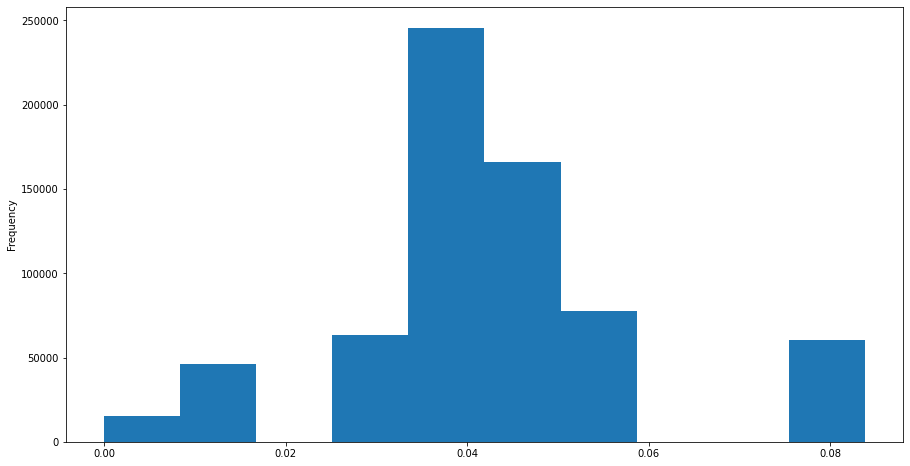

In [337]:
df.cohort_proba.plot.hist()

In [338]:
df[df.ip == '192.168.1.145']

,date,time,page,user_id,cohort_id,ip,cohort_proba,userid_proba,ip_proba
date_time,,,,,,,,,


In [339]:
df.groupby('cohort_id').ip.count()

cohort_id
1.0      8884
2.0        93
4.0         4
5.0         1
6.0        72
7.0       495
8.0      1712
9.0         5
11.0      208
12.0      302
13.0     2733
14.0     9495
15.0      691
16.0      743
17.0     4925
18.0     2005
19.0     1165
21.0     7444
22.0    30328
23.0    28329
24.0    35624
25.0    25427
26.0    27637
27.0    20447
28.0    60315
29.0    37548
31.0    25253
32.0    28333
33.0    40168
34.0    25181
51.0    29688
52.0    27518
53.0    36047
55.0    20411
56.0    31670
57.0    32447
58.0    28354
59.0    22425
61.0    11774
62.0     8718
Name: ip, dtype: int64

In [340]:
df.index.max()

Timestamp('2020-11-02 16:48:47')

In [341]:
df.groupby(['ip', 'user_id']).size()

ip               user_id
100.11.170.135   658        114
100.19.73.35     658        408
100.35.67.162    52          11
103.137.12.164   469          9
103.208.220.130  369          1
                           ... 
99.97.208.13     68          44
99.97.210.12     606         18
99.98.32.165     324        267
99.98.32.97      481         46
99.98.36.168     310        391
Length: 6182, dtype: int64

In [342]:
df

,date,time,page,user_id,cohort_id,ip,cohort_proba,userid_proba,ip_proba
date_time,,,,,,,,,
2018-01-26 09:55:03,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,0.002380,0.008951,0.085706
2018-01-26 09:56:02,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,0.002380,0.008951,0.085706
2018-01-26 09:56:05,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,0.002380,0.008951,0.085706
2018-01-26 09:56:06,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,0.002380,0.008951,0.085706
2018-01-26 09:56:24,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,0.042154,0.002142,0.085706
...,...,...,...,...,...,...,...,...,...
2020-11-02 16:48:13,2020-11-02,16:48:13,javascript-i/coffee-project,763,62.0,107.192.148.199,0.012117,0.000284,0.000246
2020-11-02 16:48:17,2020-11-02,16:48:17,javascript-i/mapbox-api,771,62.0,172.125.226.175,0.012117,0.000353,0.000353
2020-11-02 16:48:18,2020-11-02,16:48:18,javascript-i/coffee-project,771,62.0,172.125.226.175,0.012117,0.000353,0.000353


<AxesSubplot:xlabel='cohort_id'>

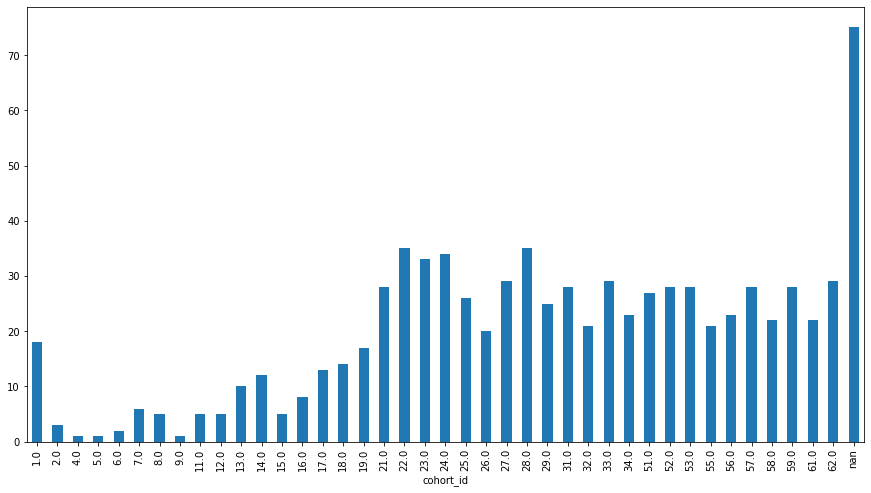

In [343]:
df.groupby('cohort_id', dropna = False).user_id.nunique().plot(kind = 'bar')

In [344]:
pd.DataFrame(df.page.value_counts())

,page
/,40122
search/search_index.json,15393
javascript-i,14551
toc,14018
java-iii,10835
...,...
sql,1
8-clustering/End_to_End_Clustering,1
users/2/edit,1
content/html-css/forms-i/index.html,1


<AxesSubplot:xlabel='date_time'>

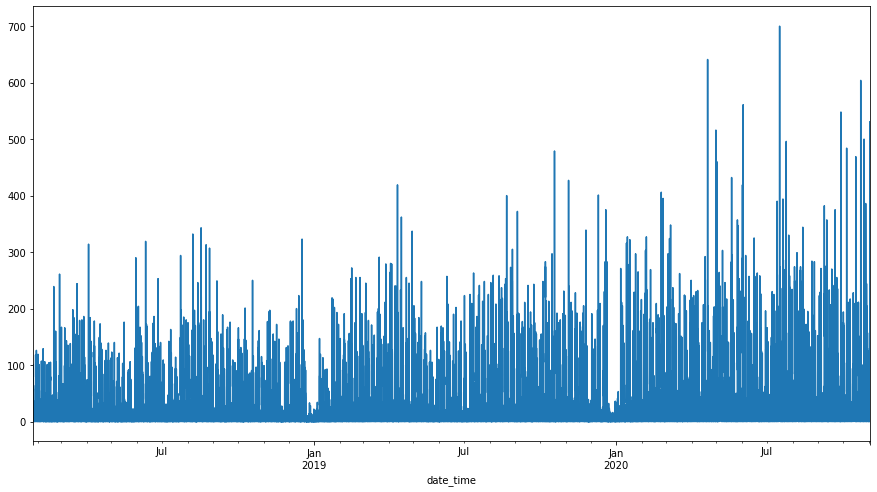

In [345]:
# lets see how many page visit we had per hour

df.resample('H').page.size().plot()


In [346]:
df_access_date = df.groupby('cohort_id').date.agg(['min', 'max'])

In [347]:
df_access_date['min'] = pd.to_datetime(df_access_date['min'])

In [348]:
df_access_date['max'] = pd.to_datetime(df_access_date['max'])

In [349]:
df_access_date['duration'] = ((df_access_date['max'] - df_access_date['min'])/pd.Timedelta('1Day'))

<AxesSubplot:xlabel='cohort_id'>

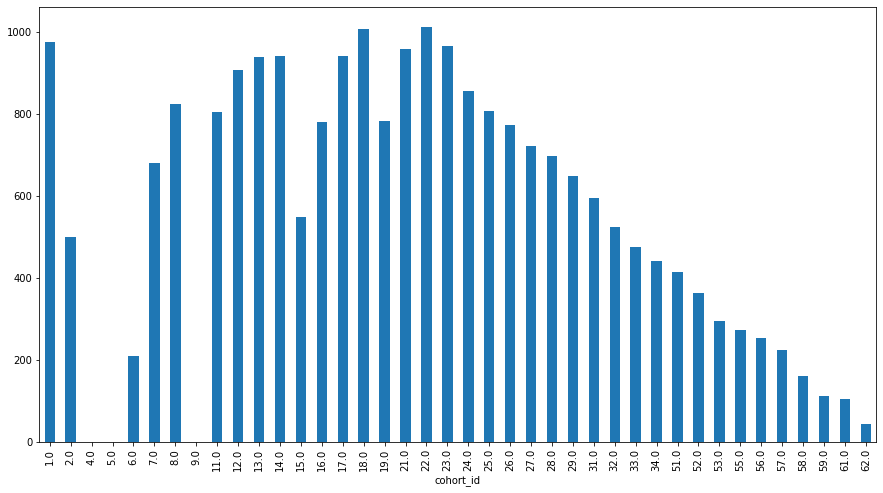

In [350]:
df_access_date.duration.plot(kind = 'bar')

In [351]:
df_access_date

,min,max,duration
cohort_id,,,
1.0,2018-01-26,2020-09-27,975.0
2.0,2018-03-19,2019-07-31,499.0
4.0,2018-02-04,2018-02-04,0.0
5.0,2020-05-06,2020-05-06,0.0
6.0,2018-10-16,2019-05-12,208.0
7.0,2018-01-31,2019-12-11,679.0
8.0,2018-01-26,2020-04-28,823.0
9.0,2018-03-22,2018-03-22,0.0
11.0,2018-05-07,2020-07-20,805.0


In [352]:
cohort_df = pd.DataFrame(df.groupby('cohort_id').resample('H').page.size())

In [353]:
# cohort_df.unstack(0).resample('W').mean().plot()

<AxesSubplot:xlabel='date_time'>

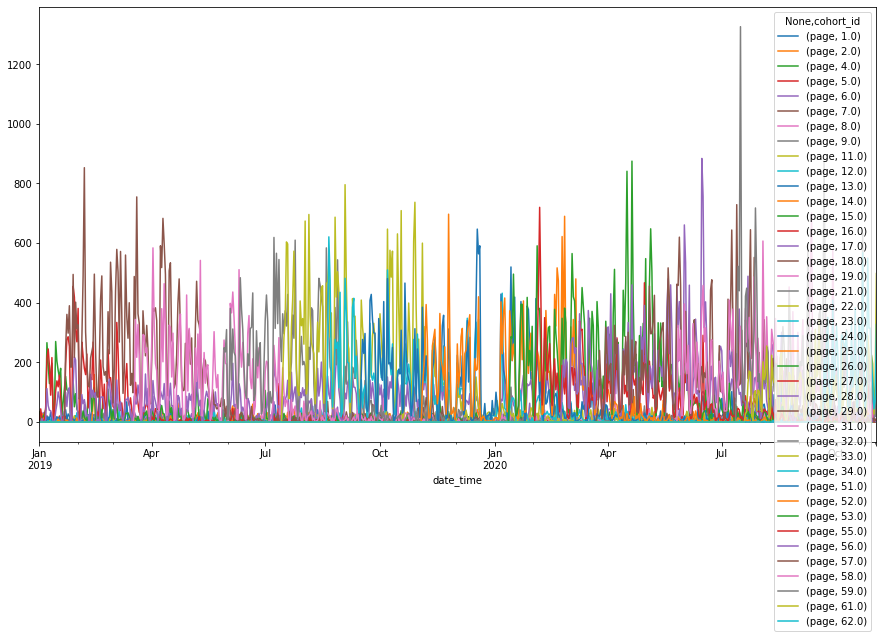

In [354]:
cohort_df.unstack(0)['2019':'2020'].resample('D').sum().plot()

# Checking anomalous activities within darden cohort

In [357]:
darden = df[df.cohort_id == 59]

In [370]:
darden = darden[['date', 'time', 'page', 'ip', 'user_id']]

In [375]:
darden_page_hits_daily = pd.DataFrame(darden.resample('D').page.count())

<AxesSubplot:xlabel='date_time'>

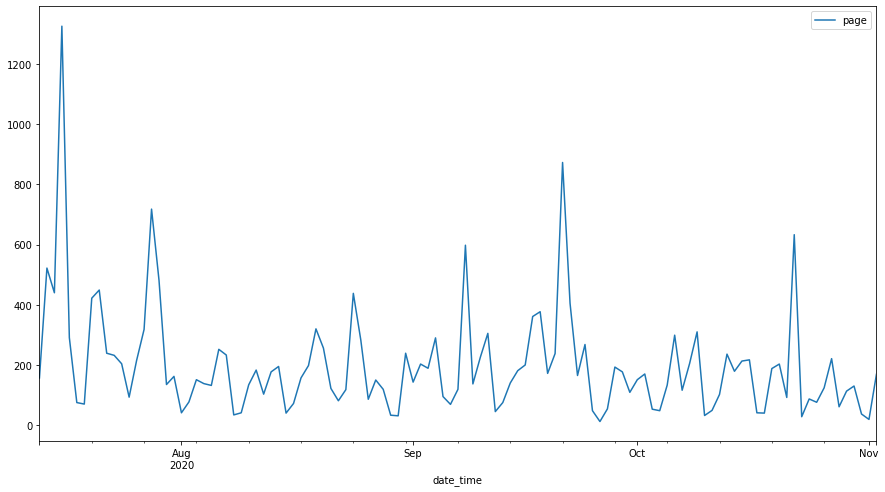

In [376]:
darden_page_hits_daily.plot()

In [377]:
darden_page_hits_hourly = pd.DataFrame(darden.resample('H').page.count())

<AxesSubplot:xlabel='date_time'>

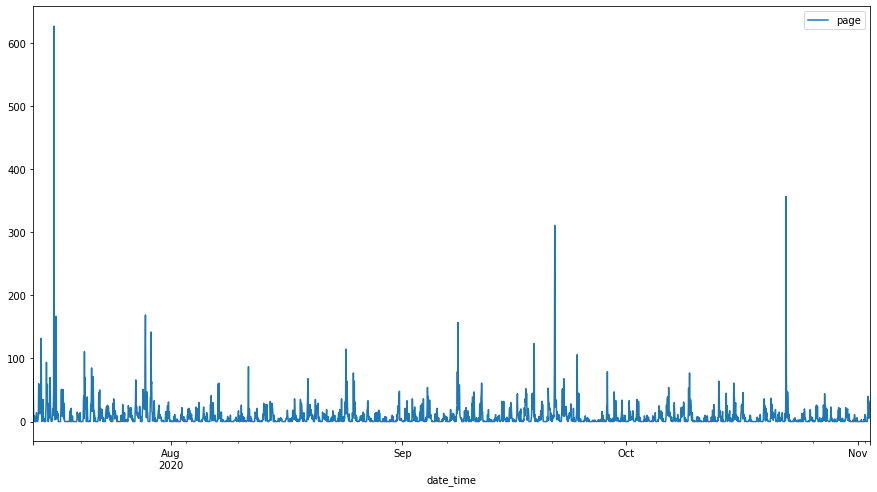

In [379]:
darden_page_hits_hourly.plot()

In [380]:
darden_page_hits_hourly

,page
date_time,
2020-07-13 14:00:00,95
2020-07-13 15:00:00,36
2020-07-13 16:00:00,0
2020-07-13 17:00:00,3
2020-07-13 18:00:00,3
...,...
2020-11-02 11:00:00,5
2020-11-02 12:00:00,11
2020-11-02 13:00:00,14


In [386]:
# lets do some datasplit

train = darden_page_hits_hourly[:'2020-09-15']
validate = darden_page_hits_hourly['2020-09-16': '2020-10-10']
test = darden_page_hits_hourly['2020-10-11':]

In [388]:
# check the split are correct

len(test) + len(validate) + len(train) == len(darden_page_hits_hourly)

True

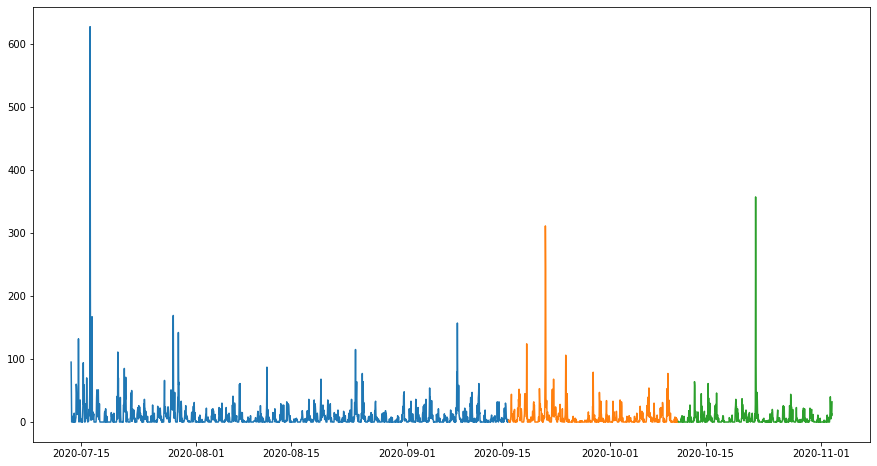

In [391]:
plt.plot(train)
plt.plot(validate)
plt.plot(test)
plt.show()

In [399]:
# Simple moving average

sma_short = train.rolling(window = 24).mean()
sma_short

,page
date_time,
2020-07-13 14:00:00,NaN
2020-07-13 15:00:00,NaN
2020-07-13 16:00:00,NaN
2020-07-13 17:00:00,NaN
2020-07-13 18:00:00,NaN
...,...
2020-09-15 19:00:00,7.541667
2020-09-15 20:00:00,7.500000
2020-09-15 21:00:00,7.500000


In [400]:
sma_long = train.rolling(window = 168).mean()
sma_long

,page
date_time,
2020-07-13 14:00:00,NaN
2020-07-13 15:00:00,NaN
2020-07-13 16:00:00,NaN
2020-07-13 17:00:00,NaN
2020-07-13 18:00:00,NaN
...,...
2020-09-15 19:00:00,6.648810
2020-09-15 20:00:00,6.619048
2020-09-15 21:00:00,6.619048


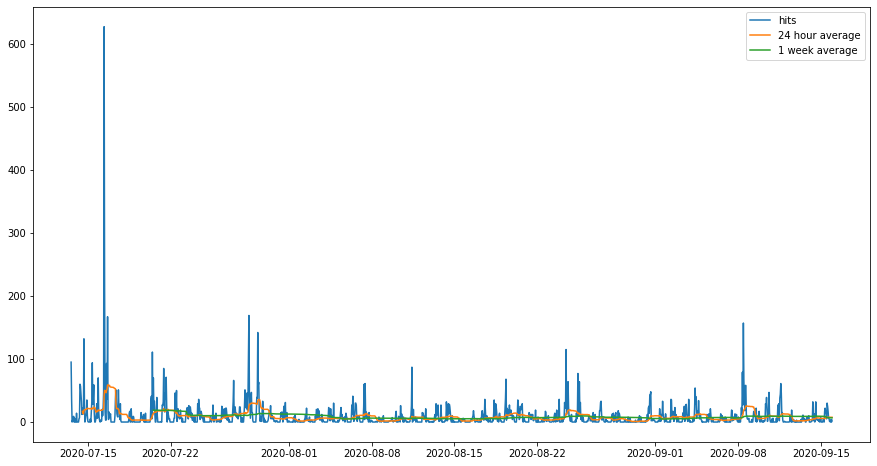

In [402]:
# lets plot the sma


fig, ax = plt.subplots()
ax.plot(train.index,train,label = 'hits')
ax.plot(train.index, sma_short, label = '24 hour average')
ax.plot(train.index, sma_long, label = '1 week average')
plt.legend()

In [403]:
# lets use exponential moving average

ema_short = train.ewm(span=24).mean()
ema_short.head()

,page
date_time,
2020-07-13 14:00:00,95.000000
2020-07-13 15:00:00,64.270833
2020-07-13 16:00:00,41.038172
2020-07-13 17:00:00,30.308348
2020-07-13 18:00:00,23.900165


In [456]:
ema_long = train.ewm(span=168).mean()
ema_long


,page,midband,ub,lb,pct_b
date_time,,,,,
2020-07-13 14:00:00,95.000000,95.000000,NaN,NaN,NaN
2020-07-13 15:00:00,65.324405,80.073882,190.482305,-59.833496,0.382850
2020-07-13 16:00:00,43.289868,67.666288,188.749879,-80.266764,0.366038
2020-07-13 17:00:00,33.036826,58.853717,180.706961,-86.528957,0.372809
2020-07-13 18:00:00,26.885582,52.306960,172.329390,-88.434195,0.380039
...,...,...,...,...,...
2020-09-15 19:00:00,7.176517,7.754404,51.335702,-35.826894,0.494032
2020-09-15 20:00:00,7.091588,7.746560,51.245836,-35.752716,0.492958
2020-09-15 21:00:00,7.055001,7.738376,51.154190,-35.677438,0.492545


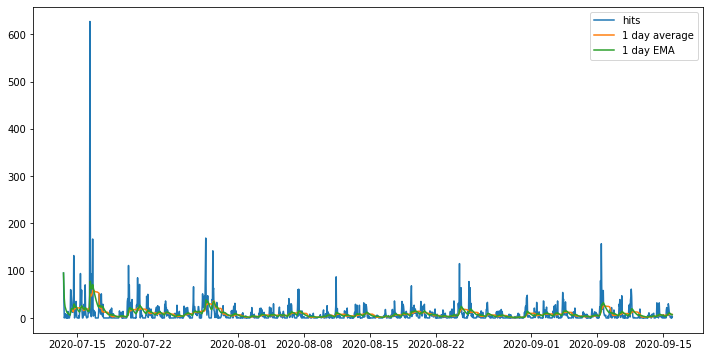

<function matplotlib.pyplot.show(close=None, block=None)>

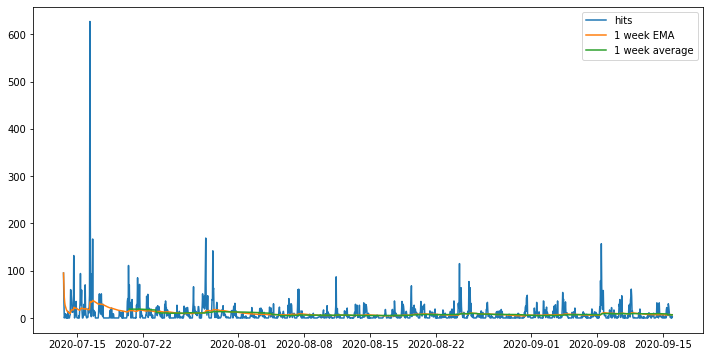

In [409]:
fig, ax1 = plt.subplots( figsize = (12,6))
ax1.plot(train.index,train,label = 'hits')
ax1.plot(train.index, sma_short, label = '1 day average')
ax1.plot(train.index, ema_short, label = '1 day EMA')
plt.legend()
plt.show()

fig, ax2 = plt.subplots( figsize = (12,6))
ax2.plot(train.index,train,label = 'hits')
ax2.plot(train.index, ema_long, label = '1 week EMA')
ax2.plot(train.index, sma_long, label = '1 week average')
plt.legend()
plt.show


In [410]:
# Bollingers Bands

In [411]:
span = 168
midband = train.ewm(span = span).mean()

In [412]:
stddev = train.ewm(span = span).std()

In [414]:
ub = midband + stddev * 3
lb = midband - stddev * 3

In [424]:
 stddev * 3

,page
date_time,
2020-07-13 14:00:00,NaN
2020-07-13 15:00:00,125.157900
2020-07-13 16:00:00,143.748086
2020-07-13 17:00:00,131.868720
2020-07-13 18:00:00,120.901271
...,...
2020-09-15 19:00:00,36.794311
2020-09-15 20:00:00,36.650413
2020-09-15 21:00:00,36.446787


Text(0, 0.5, 'Hits')

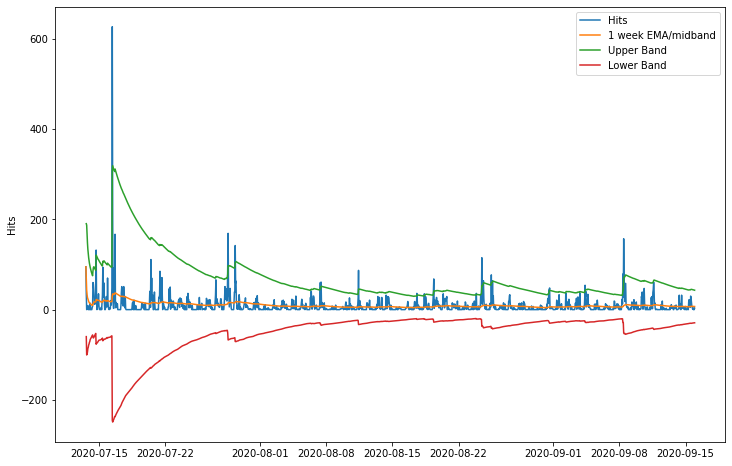

In [415]:
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(train.index, 
        train,
        label='Hits')

ax.plot(train.index, 
        midband, 
        label = '1 week EMA/midband')
ax.plot(train.index, 
        ub, 
        label = 'Upper Band')
ax.plot(train.index, 
        lb, 
        label = 'Lower Band')

ax.legend(loc='best')
ax.set_ylabel('Hits')

In [416]:
train = pd.concat([train, midband, ub, lb], axis=1)

In [418]:
train.columns = ['page', 'midband', 'ub', 'lb']

In [425]:
train['pct_b']= (train['page'] - train['lb'])/(train['ub']-train['lb'])

In [428]:
train[train['pct_b'] > 1]

,page,midband,ub,lb,pct_b
date_time,,,,,
2020-07-14 16:00:00,132,22.066443,120.806098,-76.673211,1.056684
2020-07-16 09:00:00,627,31.217887,307.647487,-245.211712,1.577638
2020-07-28 14:00:00,103,13.131563,77.911843,-51.648717,1.193640
2020-07-28 15:00:00,169,15.001288,97.180950,-67.178374,1.436964
2020-07-29 09:00:00,142,16.721302,104.108257,-70.665654,1.216804
2020-08-07 09:00:00,60,7.972669,48.104961,-32.159622,1.148198
2020-08-07 11:00:00,61,8.554225,51.830284,-34.721834,1.105944
2020-08-11 10:00:00,87,6.300124,45.668580,-33.068333,1.524931
2020-08-17 14:00:00,36,5.246773,31.995137,-21.501592,1.074862


## Lets explore some more

In [441]:
df.groupby(['user_id', 'cohort_id']).page.count().sort_values(ascending = False)

user_id  cohort_id
11       28.0         12135
64       28.0         10627
53       14.0          8197
344      29.0          5386
1        28.0          4823
                      ...  
212      1.0              1
619      57.0             1
649      5.0              1
651      27.0             1
787      55.0             1
Name: page, Length: 748, dtype: int64

In [451]:
df.groupby(['user_id', 'cohort_id', 'time']).page.count().sort_values(ascending = False)

user_id  cohort_id  time    
341      29.0       22:52:07    30
                    22:52:09    30
                    22:52:08    25
                    22:52:11    25
                    22:52:10    25
                                ..
511      51.0       16:12:59     1
                    16:12:57     1
                    16:12:12     1
                    16:08:11     1
1        8.0        00:01:32     1
Name: page, Length: 642824, dtype: int64

In [470]:
page_hits_df = pd.DataFrame(df.resample('12H').page.count())

In [471]:
page_hits_df

,page
date_time,
2018-01-26 00:00:00,175
2018-01-26 12:00:00,397
2018-01-27 00:00:00,71
2018-01-27 12:00:00,159
2018-01-28 00:00:00,38
...,...
2020-10-31 12:00:00,165
2020-11-01 00:00:00,174
2020-11-01 12:00:00,201


**We can do the whole thing and create a bollinger band with it**

## Lets try other exploration

In [479]:
top_pages = df.page.value_counts().head(1000)

/                                                          40122
search/search_index.json                                   15393
javascript-i                                               14551
toc                                                        14018
java-iii                                                   10835
                                                           ...  
content/html-css/css-ii/media-queries.html                    16
fundamentals/cli/file-paths                                   16
12-distributed-ml/3-getting-started                           15
content/php_ii/array-functions/searching-in-arrays.html       15
sessions-and-cookies                                          15
Name: page, Length: 1000, dtype: int64

In [481]:
df_access_date.rename(columns = {'min': 'start_date'}, inplace = True)

In [482]:
df_access_date

,start_date,max,duration
cohort_id,,,
1.0,2018-01-26,2020-09-27,975.0
2.0,2018-03-19,2019-07-31,499.0
4.0,2018-02-04,2018-02-04,0.0
5.0,2020-05-06,2020-05-06,0.0
6.0,2018-10-16,2019-05-12,208.0
7.0,2018-01-31,2019-12-11,679.0
8.0,2018-01-26,2020-04-28,823.0
9.0,2018-03-22,2018-03-22,0.0
11.0,2018-05-07,2020-07-20,805.0


In [493]:
df1 = df.fillna(0)

cohort = df1.cohort_id.unique()

In [494]:
cohort = list(cohort)

In [495]:
cohort

[8.0,
 22.0,
 21.0,
 1.0,
 16.0,
 18.0,
 19.0,
 0.0,
 13.0,
 14.0,
 15.0,
 7.0,
 4.0,
 12.0,
 17.0,
 23.0,
 2.0,
 9.0,
 11.0,
 24.0,
 25.0,
 26.0,
 6.0,
 27.0,
 28.0,
 29.0,
 31.0,
 32.0,
 33.0,
 34.0,
 51.0,
 52.0,
 53.0,
 55.0,
 56.0,
 57.0,
 5.0,
 58.0,
 59.0,
 61.0,
 62.0]

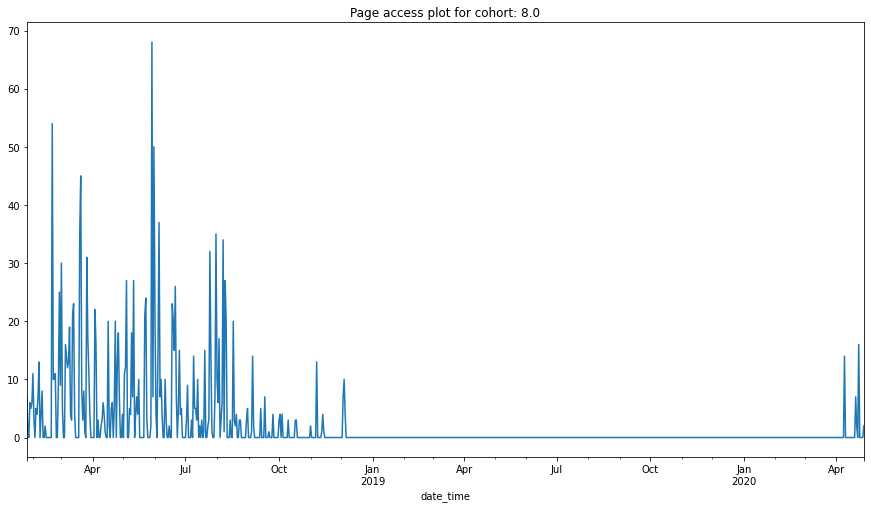

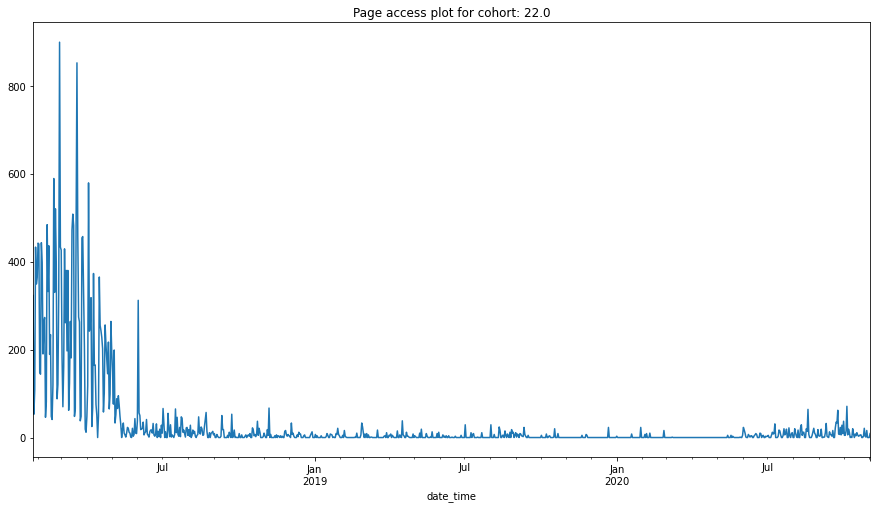

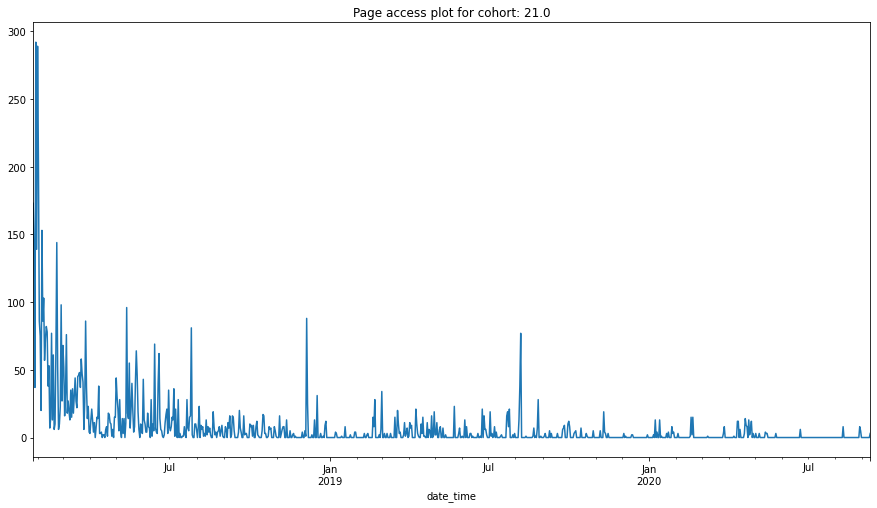

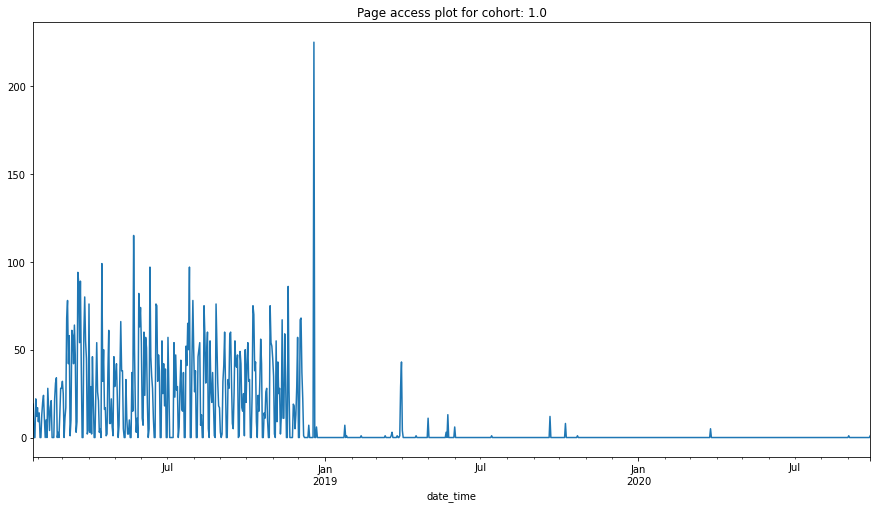

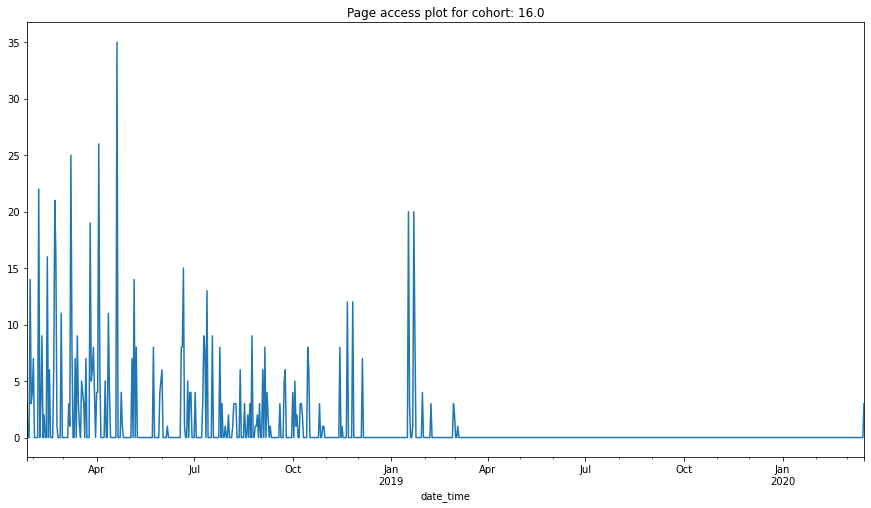

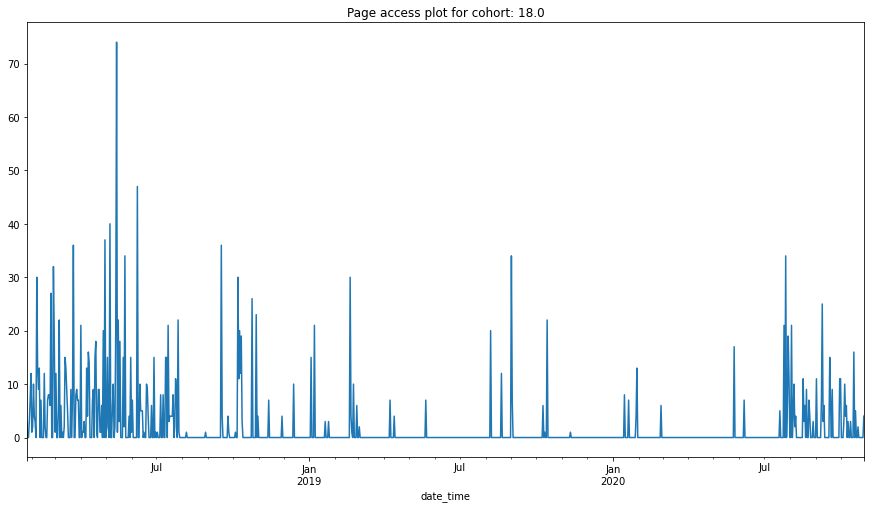

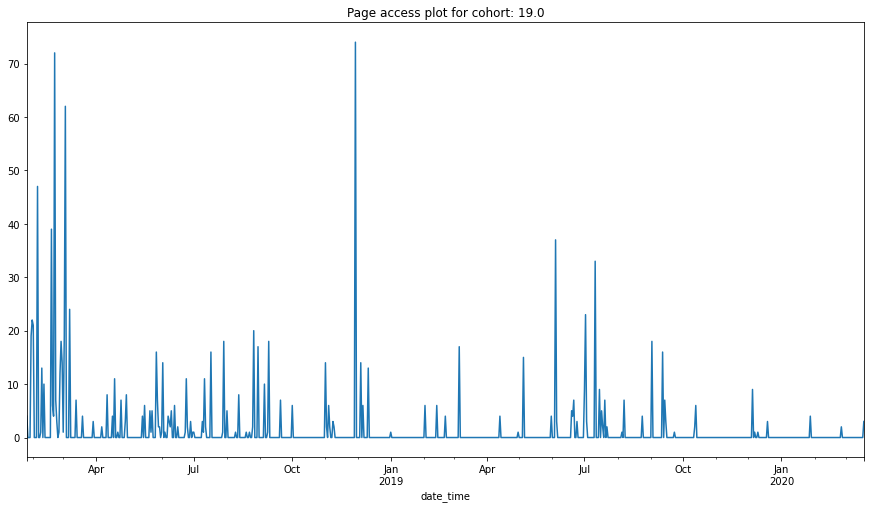

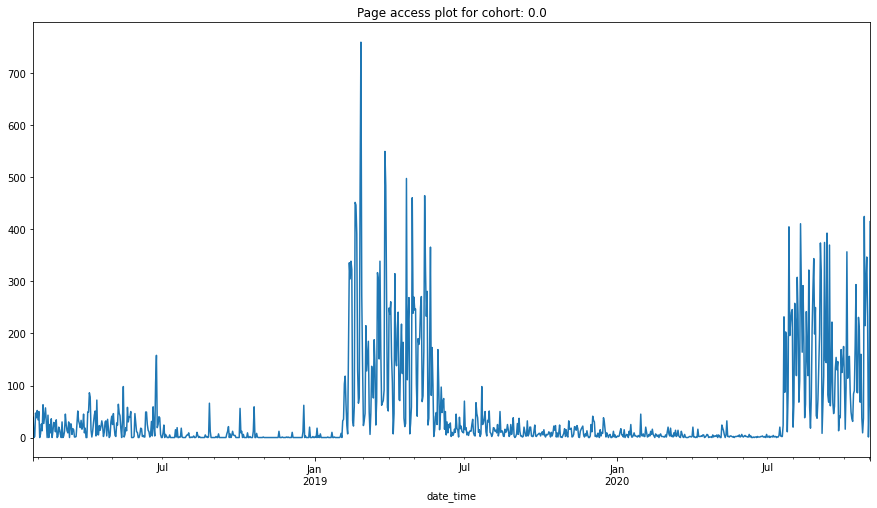

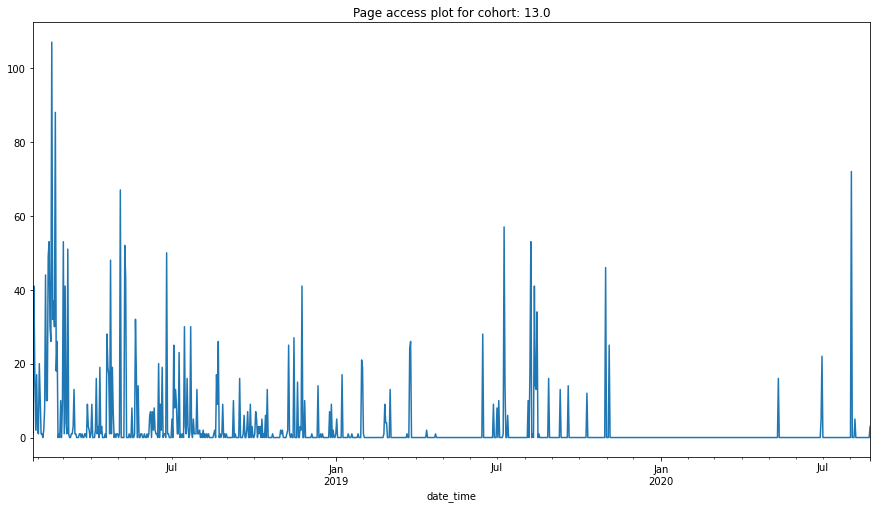

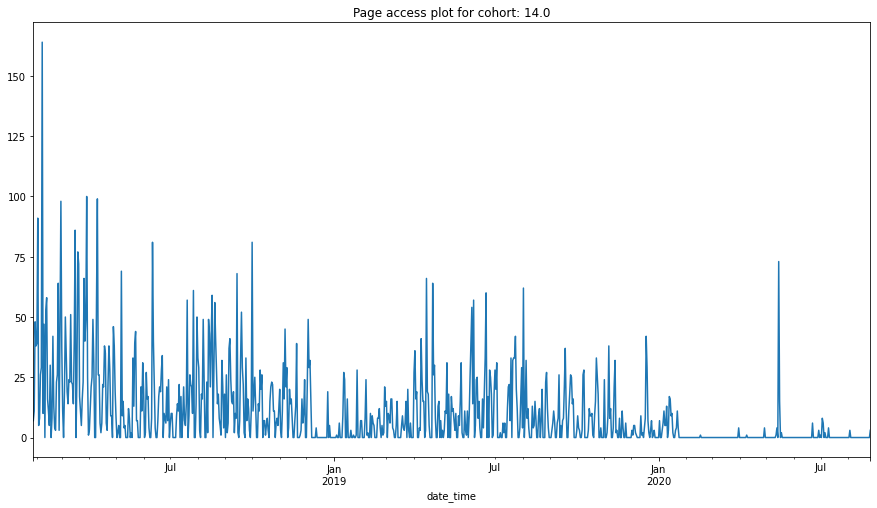

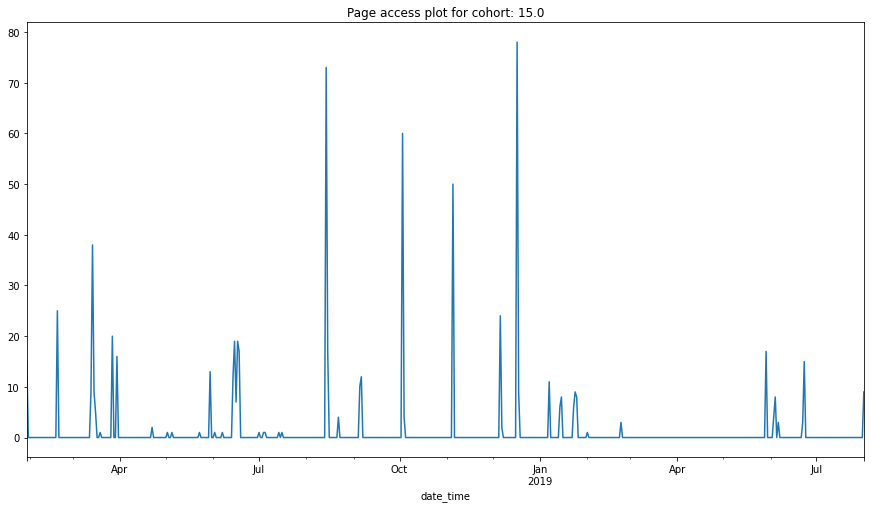

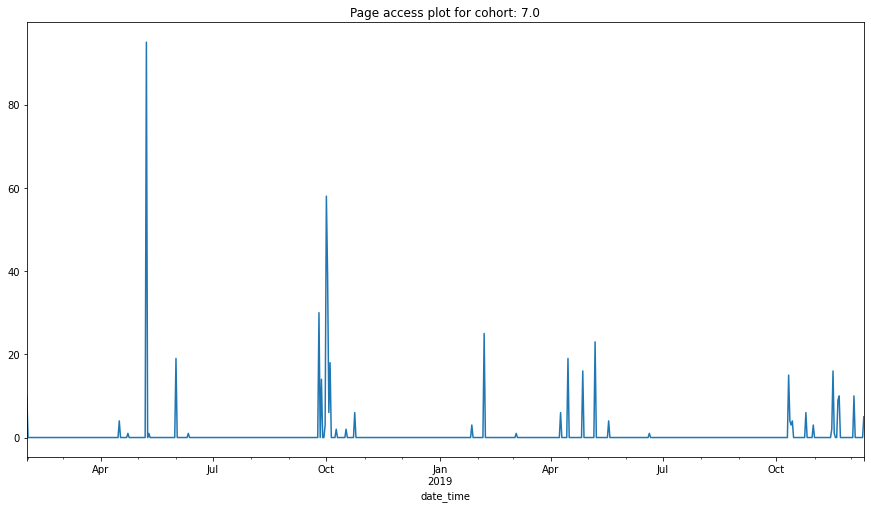

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1136: UserWarning: Attempting to set identical left == right == 17566.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


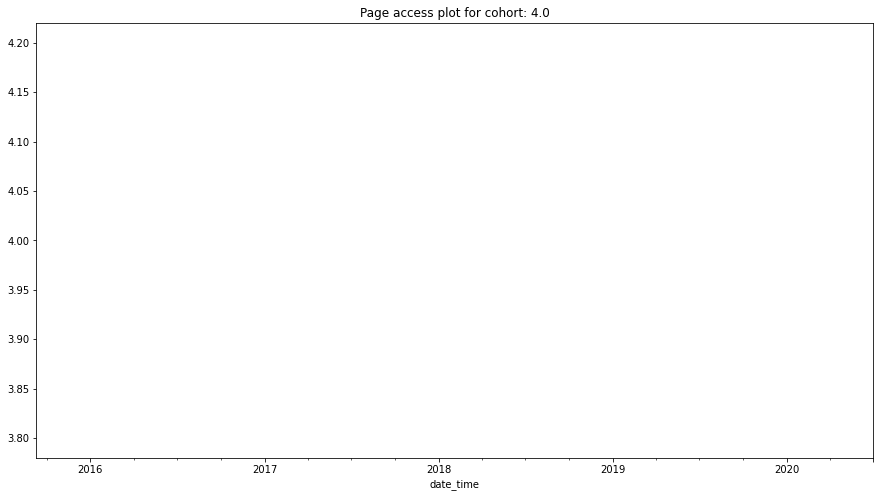

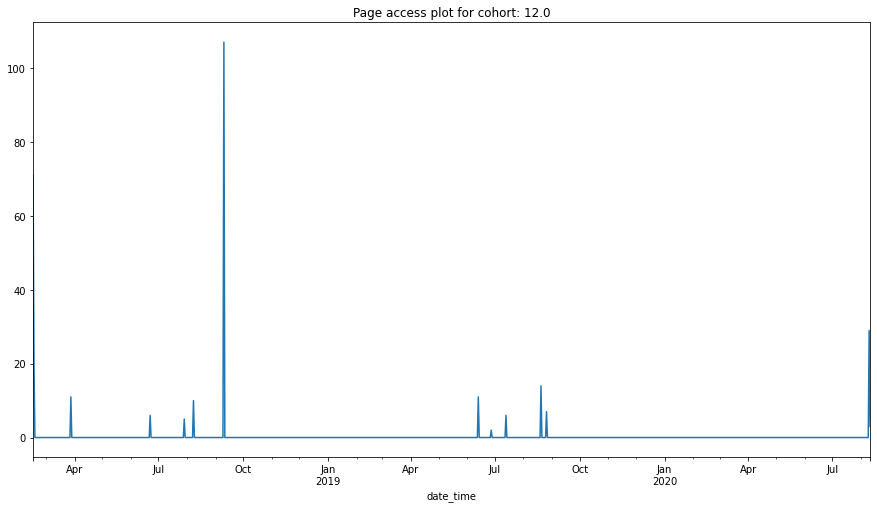

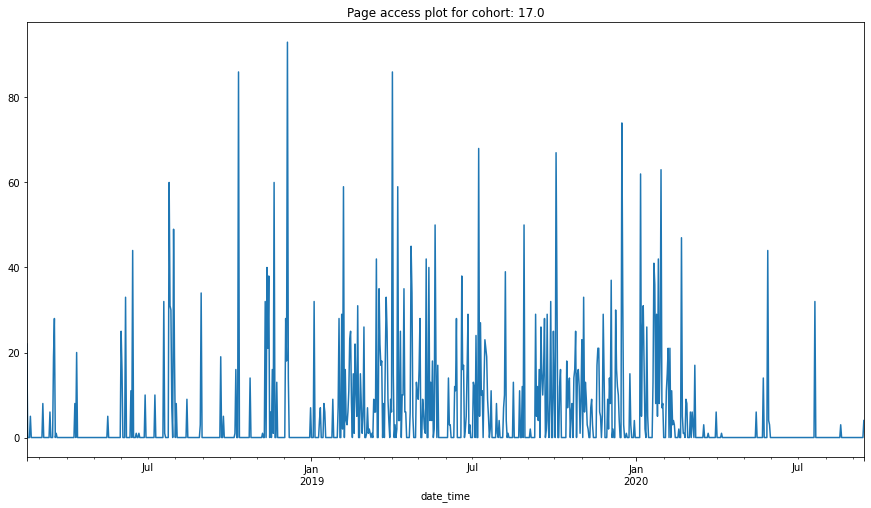

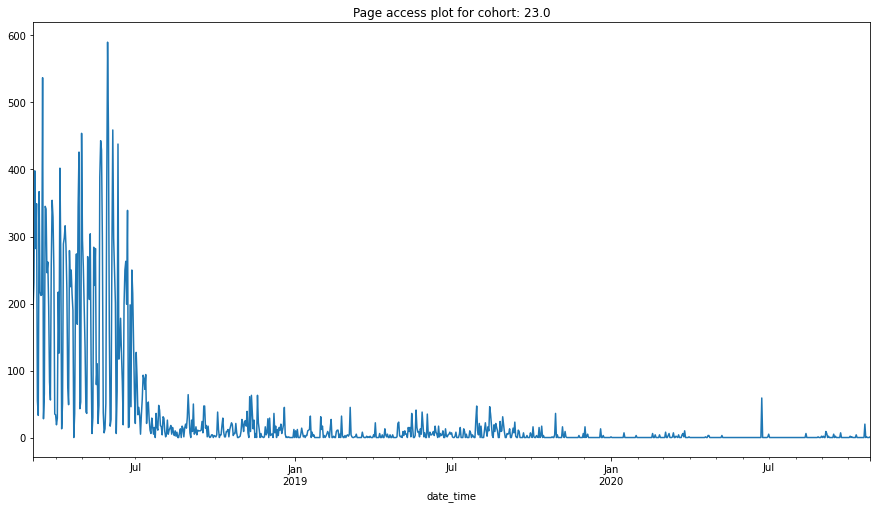

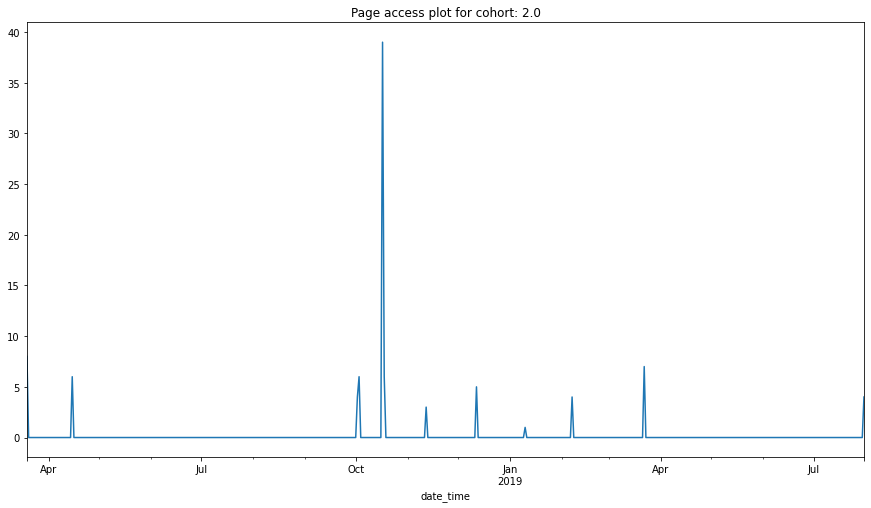

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1136: UserWarning: Attempting to set identical left == right == 17612.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


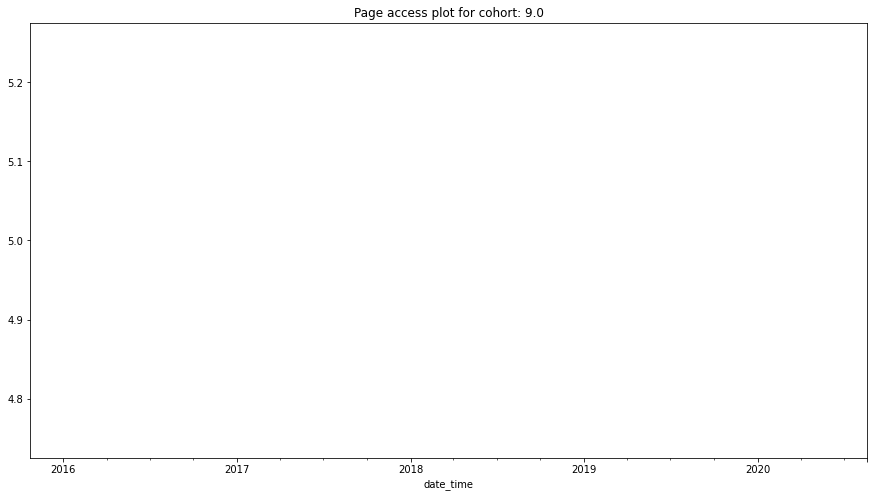

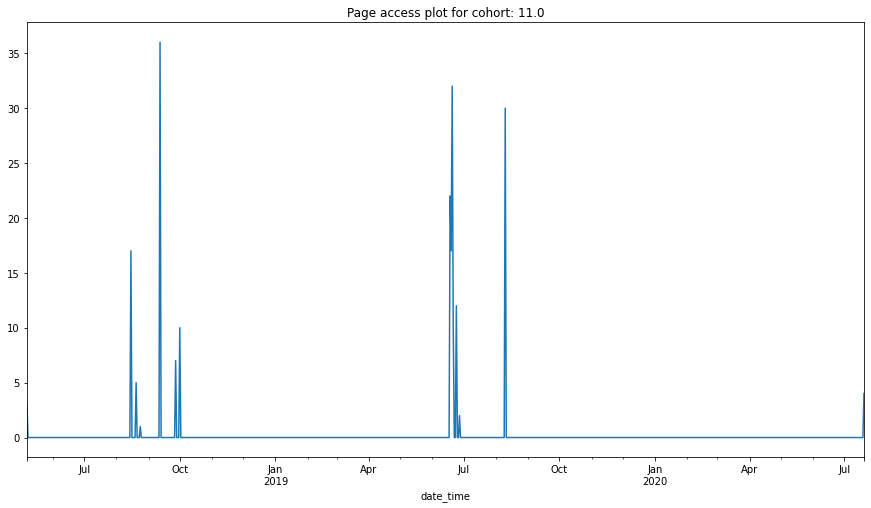

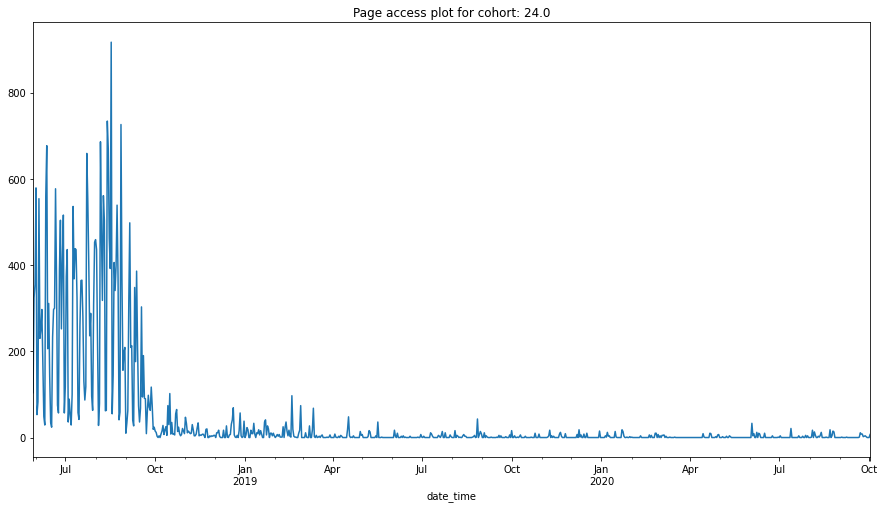

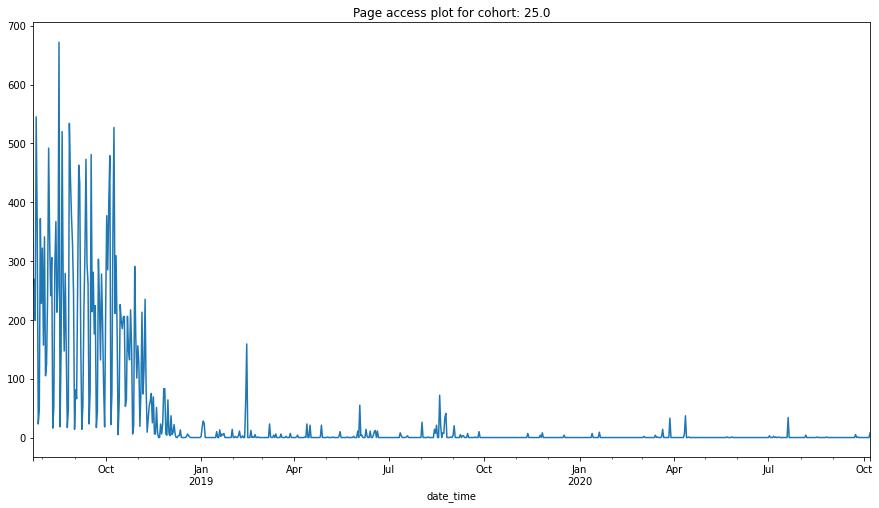

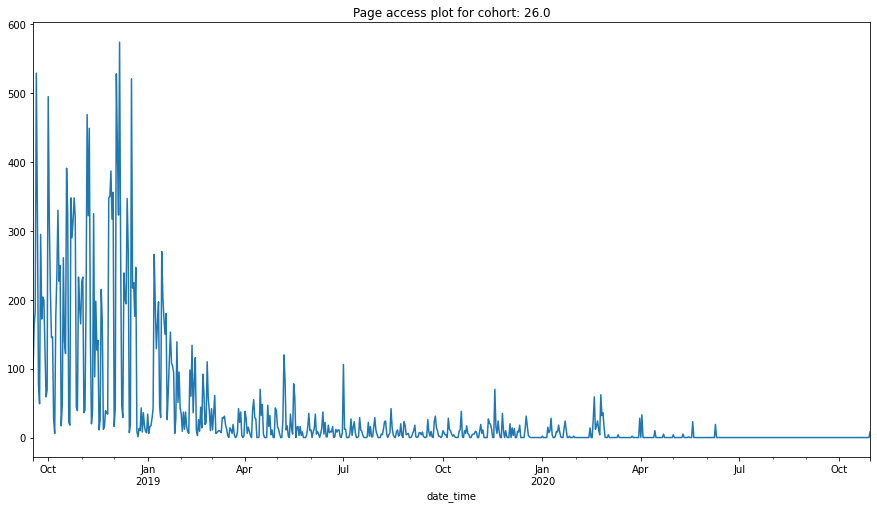

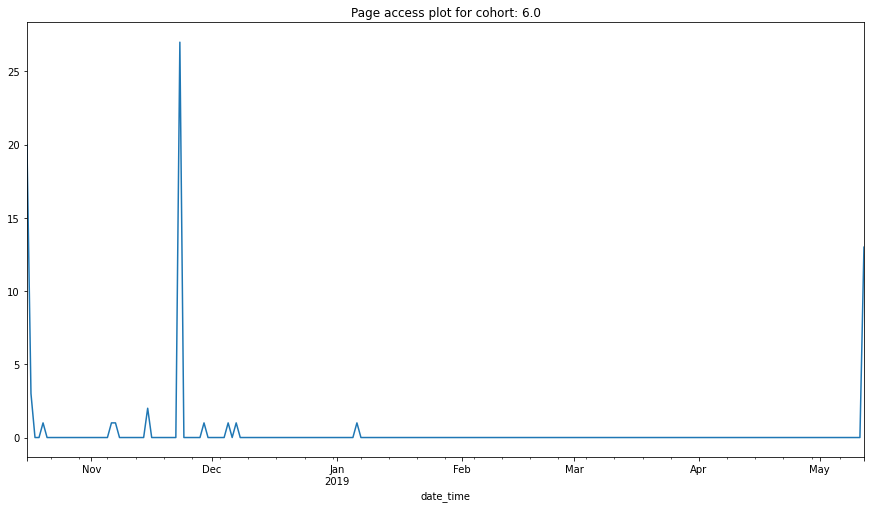

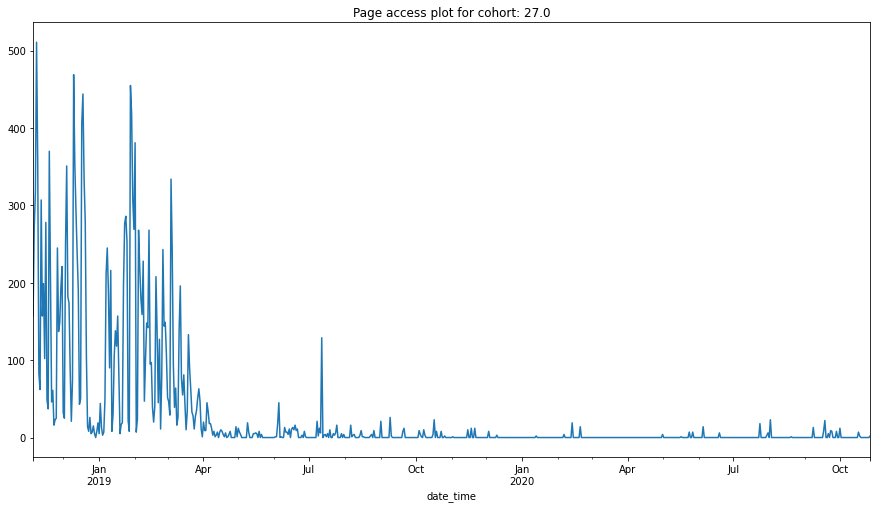

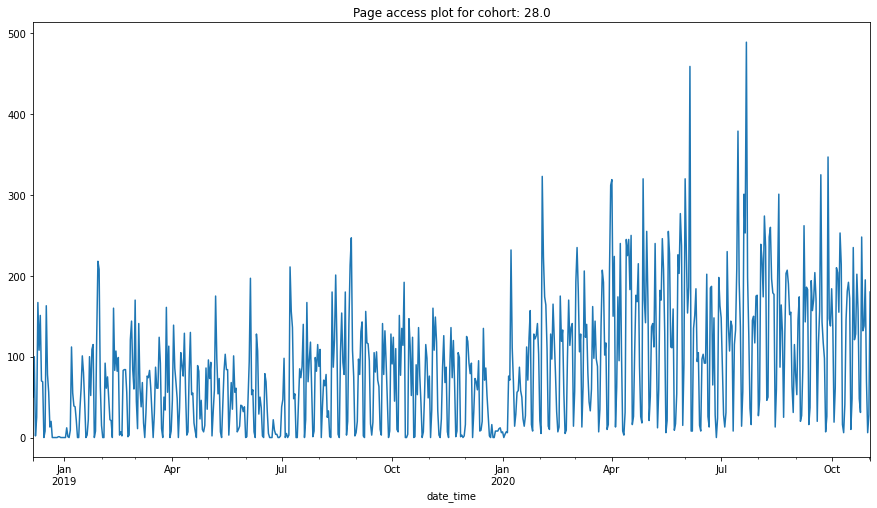

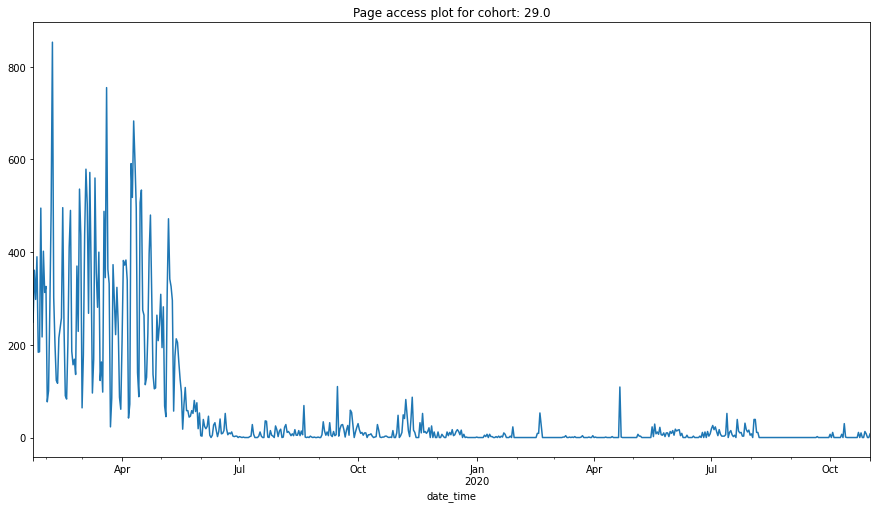

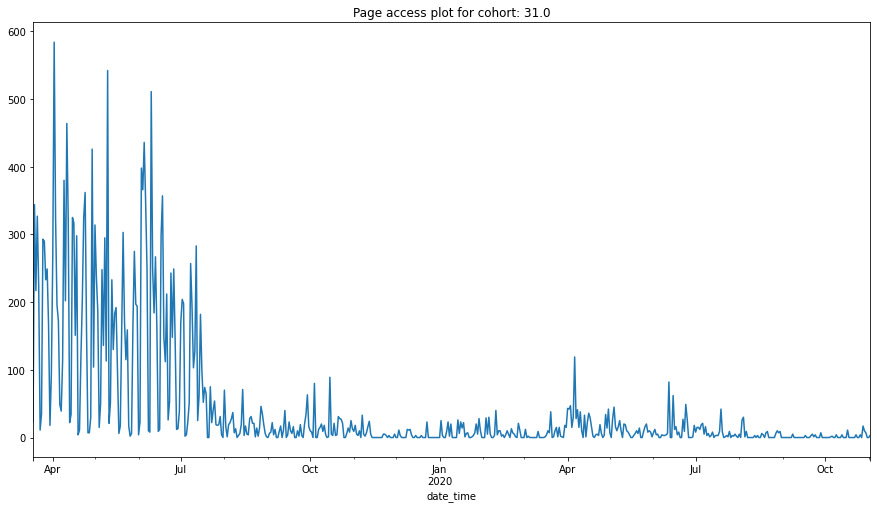

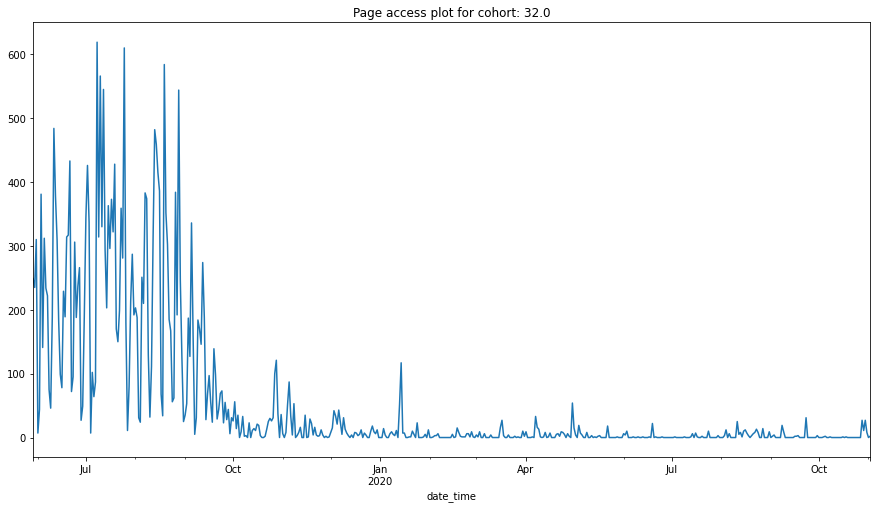

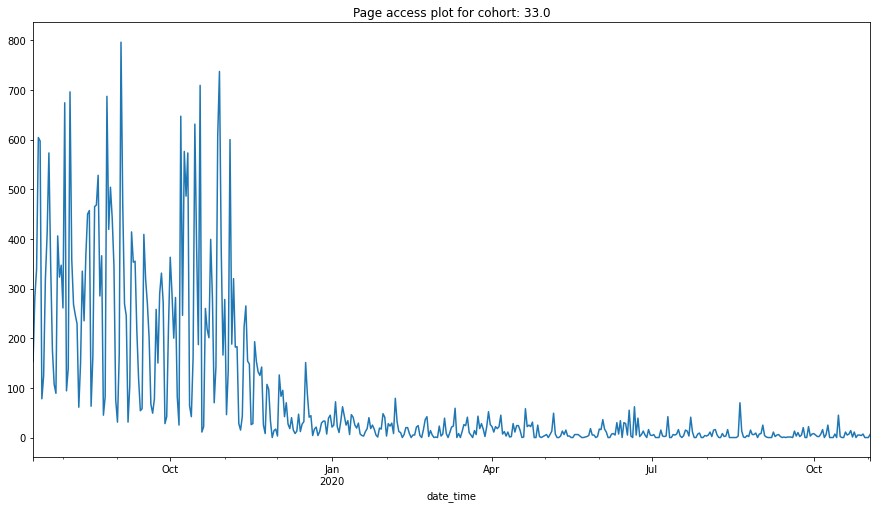

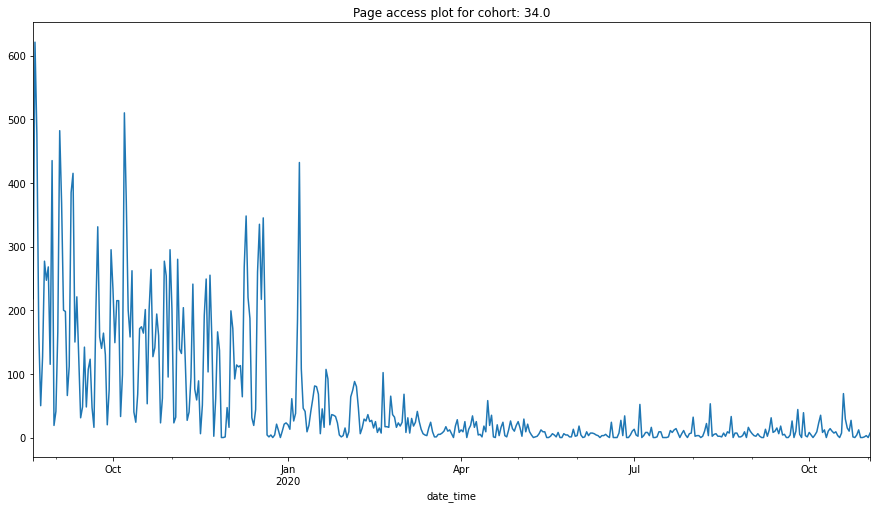

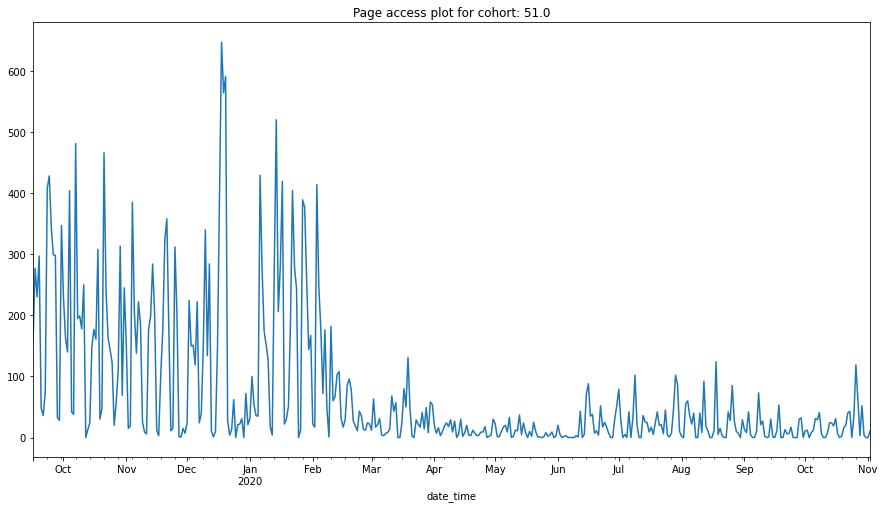

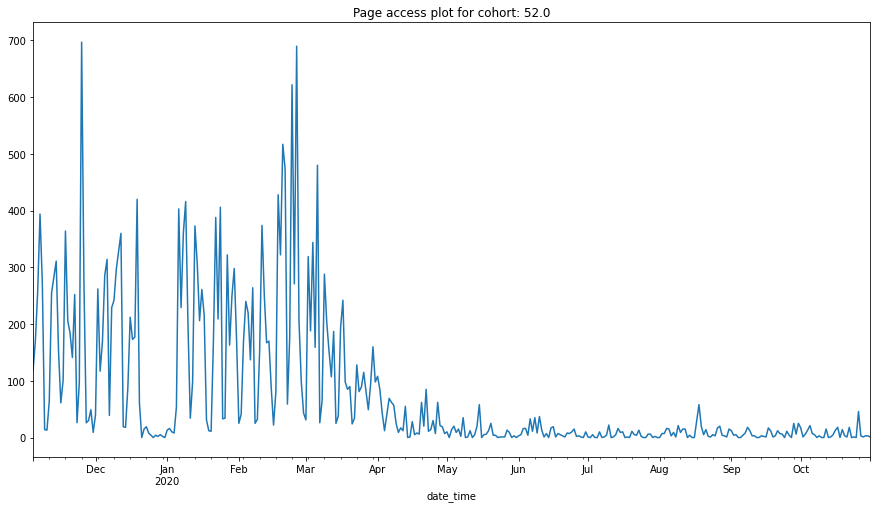

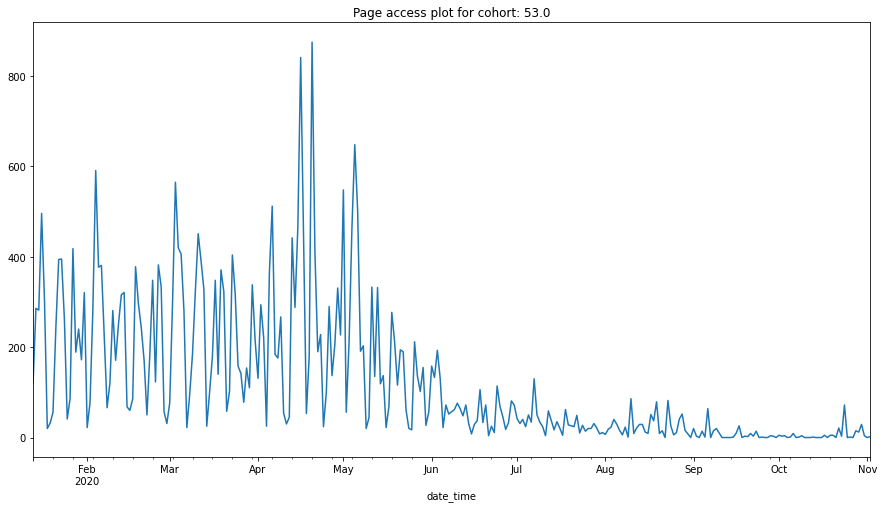

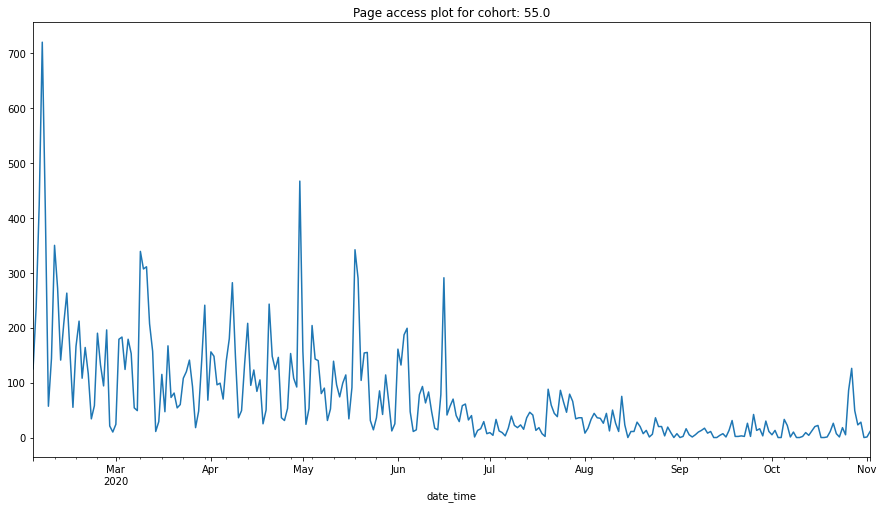

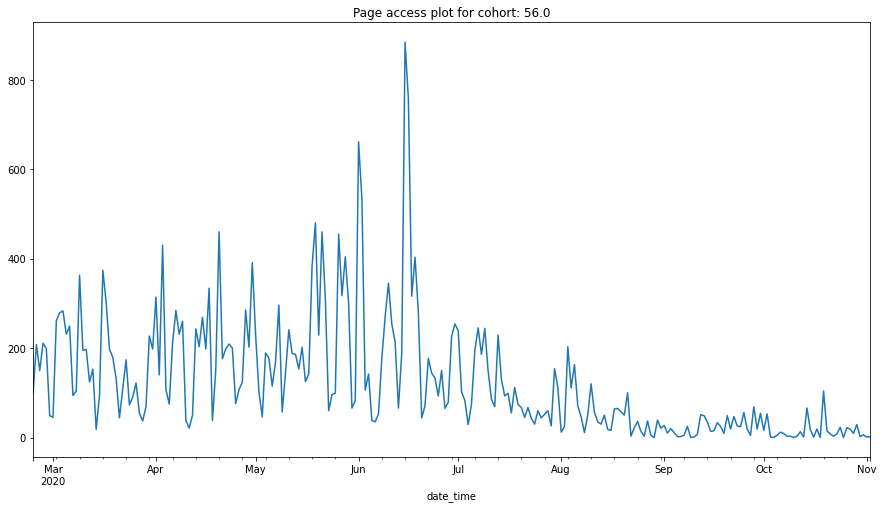

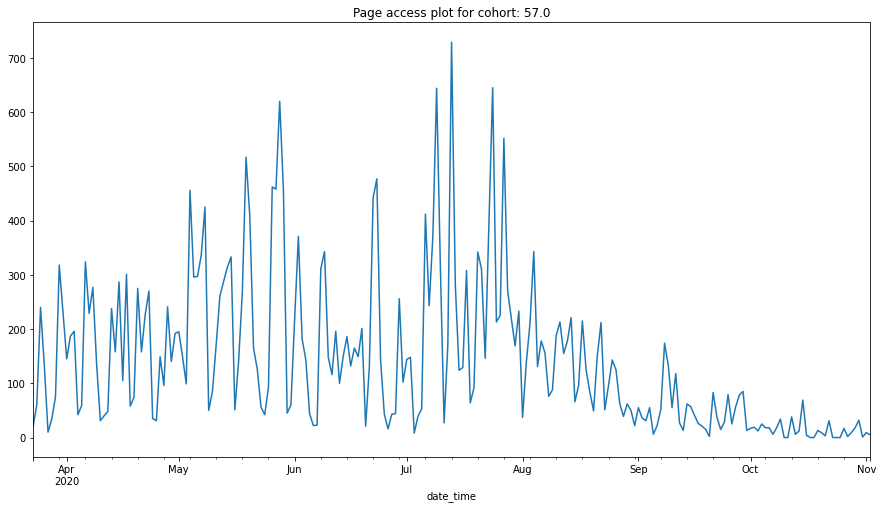

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1136: UserWarning: Attempting to set identical left == right == 18388.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


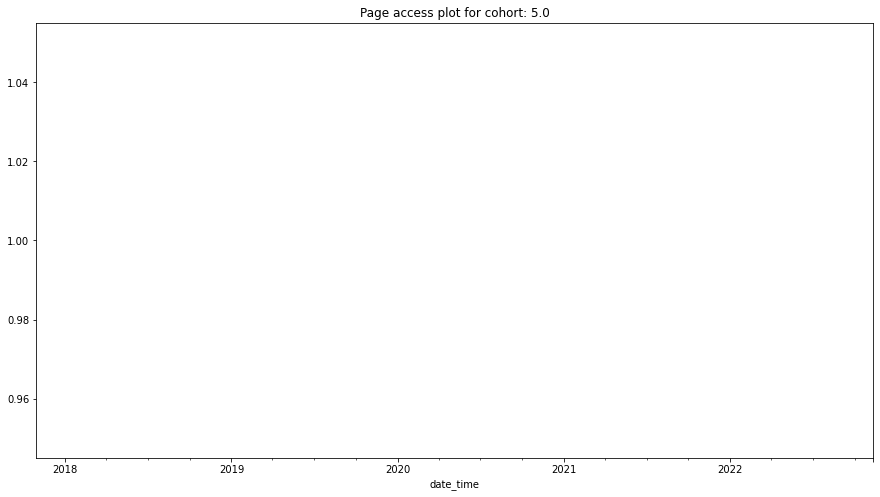

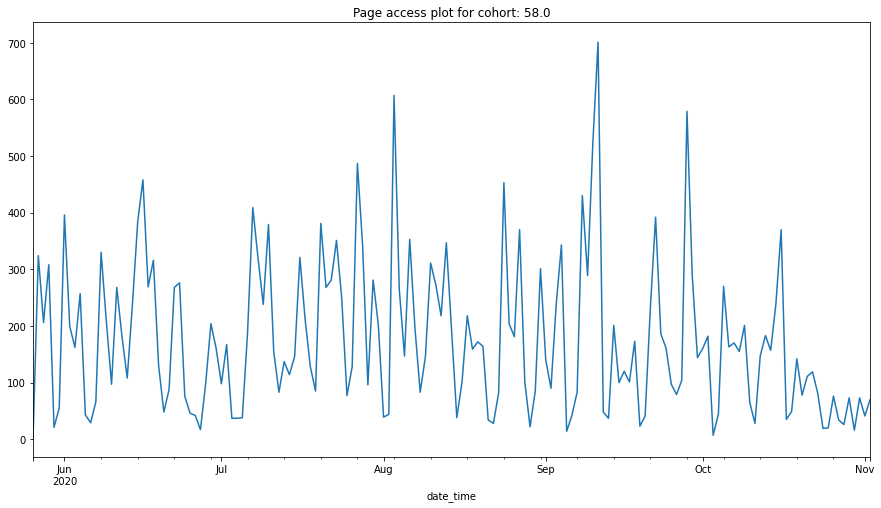

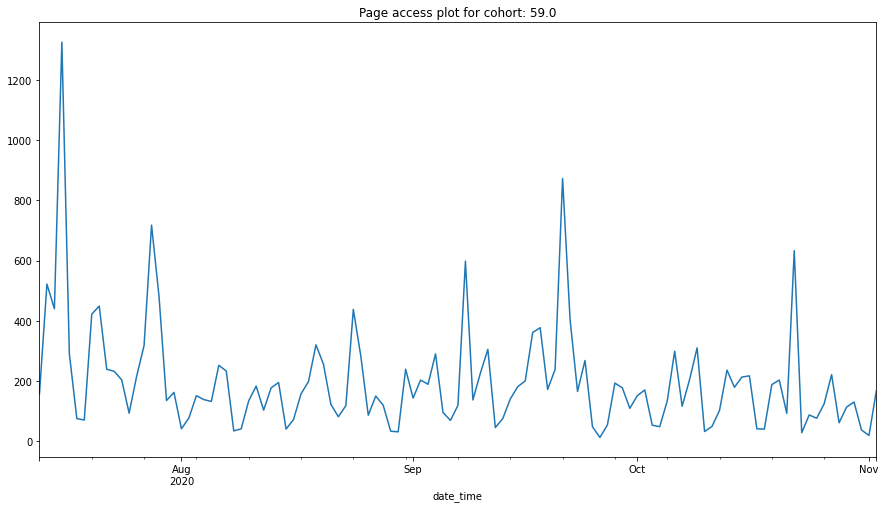

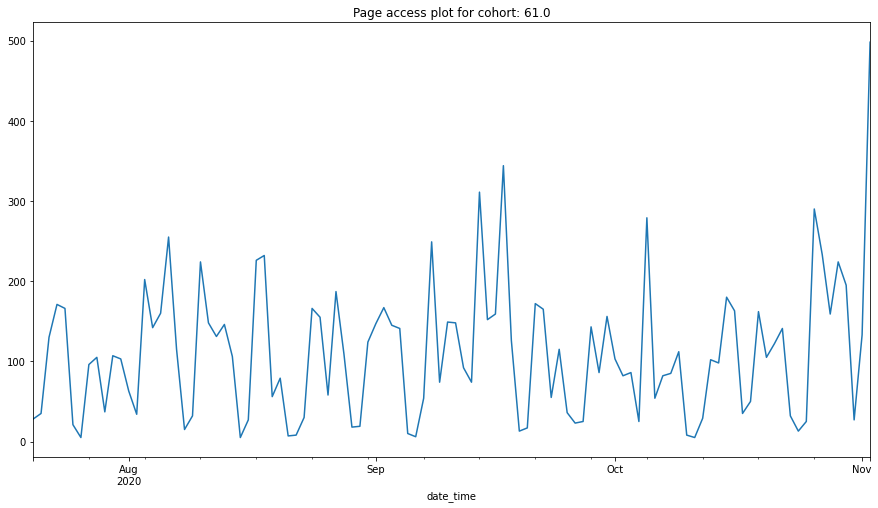

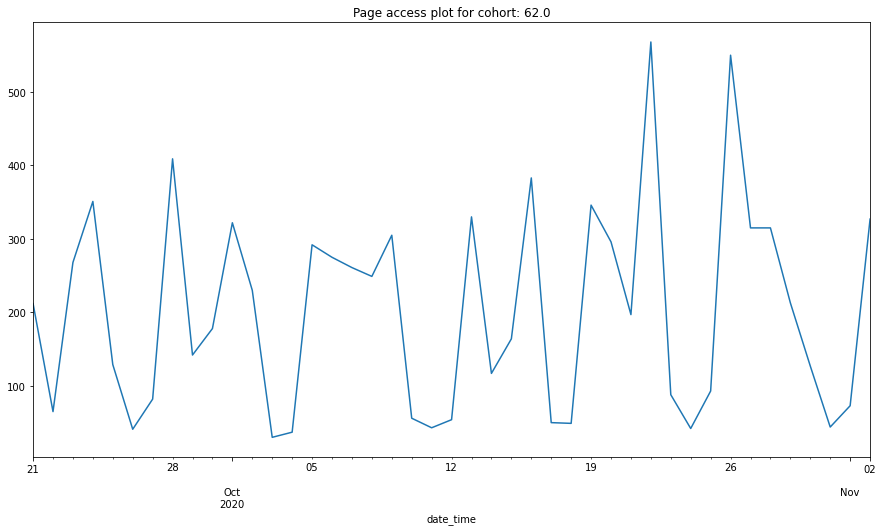

In [510]:
for num in cohort:
    df1[df1.cohort_id == num].resample('D').page.count().plot()
    plt.title('Page access plot for cohort: '+ str(num))
    plt.show()


In [512]:
user_id = list(df.user_id.unique())

In [519]:
len(user_id)

787

In [524]:
# for num in user_id:
#     df[df.user_id == num].resample('D').page.count().plot()
#     plt.show()

In [532]:
df.groupby(['date','cohort_id']).page.agg(['count'])

count
date       cohort_id       
2018-01-26 1.0           19
           8.0            7
           13.0           1
           16.0           3
           18.0           3
...                     ...
2020-11-02 57.0           5
           58.0          70
           59.0         169
           61.0         498
           62.0         327

[9627 rows x 1 columns]